# Inspección de los datos

In [1]:
!pip install wordcloud

In [33]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import json

In [3]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [5]:
drive_service = google_authenticate()

In [8]:
df = pd.read_csv('test.csv')

In [10]:
df.head()

,Author,Content,Date,Linked Messages,Message ID,ThreadTitle,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,EscapeFromLife,Is getting married before CTB a good idea? Per...,"Jul 8, 2024 at 6:12 PM",NaN,2589889,Marriage before CTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,2024-10-02T03:21:09.448199Z,1,6.880.799.999.999.990,"{""choices"":[""1 wish to be death?"",""2 thoughts ...",2024-10-02T03:21:09.448199Z
1,Traveller12724,"Bro you must be trolling, I mean who in their ...","Jul 8, 2024 at 10:05 PM",2589889,2590106,Marriage before CTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,2024-10-02T03:21:25.669006Z,2,10.03,no enough information,2024-10-02T03:21:25.669006Z
2,Myforevercharlie,I think putting someone through that is fuckin...,"Jul 8, 2024 at 10:22 PM",NaN,2590118,Marriage before CTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,2024-10-02T03:26:36.227363Z,3,304.751,no enough information,2024-10-02T03:26:36.227363Z
3,rozeske,There are better ways for recovery that don't ...,"Jul 9, 2024 at 1:50 AM",NaN,2590218,Marriage before CTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,2024-10-02T03:26:55.136421Z,4,13.271,no enough information,2024-10-02T03:26:55.136421Z
4,who doesn't matter,"Oh no, never that. My first rule has been to n...","Jul 9, 2024 at 2:19 AM",NaN,2590231,Marriage before CTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,2024-10-02T03:27:13.489896Z,5,12.969,no enough information,2024-10-02T03:27:13.489896Z


Extraemos el contenido

In [57]:
text = df['Content'].str.cat(sep=' ')

In [58]:
text

'Is getting married before CTB a good idea? Perhaps it can be a way of recovery--- but that\'s very HARD. Has anyone experienced it?\n\nProbably getting married would make things worse-- for the existing issues that are leading to CTB. So, getting married can just make things more complicated. For example, the CTB can lead investigations to the in-laws and partner, whereas doing CTB when single may only lead investigations to own parents. But, I think leaving a suicide note saying "No one is responsible for by death" beside the body may resue everyone from investigation. What do you think? Bro you must be trolling, I mean who in their right mind would get married only to ctb right after ? Why would you want to put anybody through that ? I think putting someone through that is fucking horrible.\nDid you ever think how this would effect your s.o.? There are better ways for recovery that don\'t involve marriage. Have you looked into those? Oh no, never that. My first rule has been to neve

In [59]:
stopwords= set(STOPWORDS)
new_words = []
new_stopwords=stopwords.union(new_words)

## Obtenemos las 20 palabras más repetidas

In [64]:
def printwordcloud(text, maxwords):
  # Make Wordcloud
  wordcloud = WordCloud(max_font_size=50, max_words=maxwords, background_color="white",stopwords=new_stopwords, colormap='plasma').generate(text)

  plt.rcParams["figure.figsize"] = (12,12)
  # Plot Wordcloud
  plt.plot()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

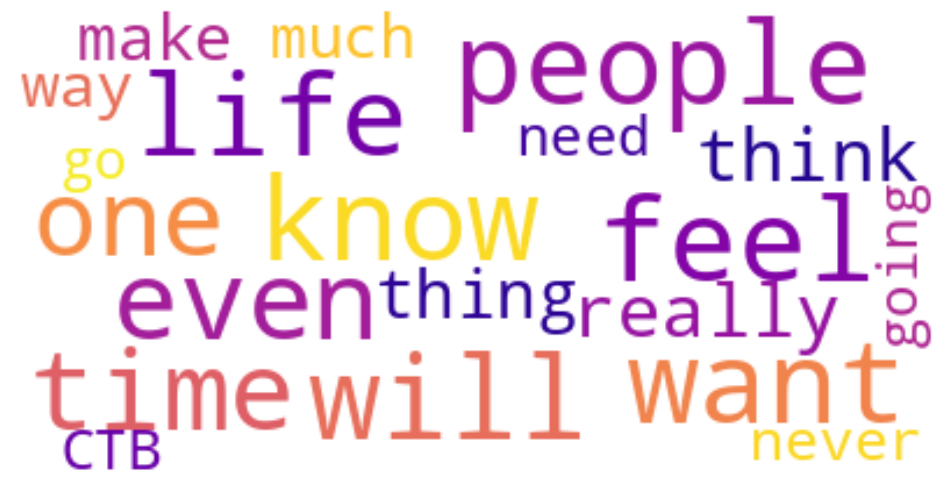

In [65]:
printwordcloud(text, 20)

### Obtenemos las palabras de low risk

In [66]:
text = df[df['sentiment'].str.contains("low risk", na=False)]['Content'].str.cat(sep=' ')

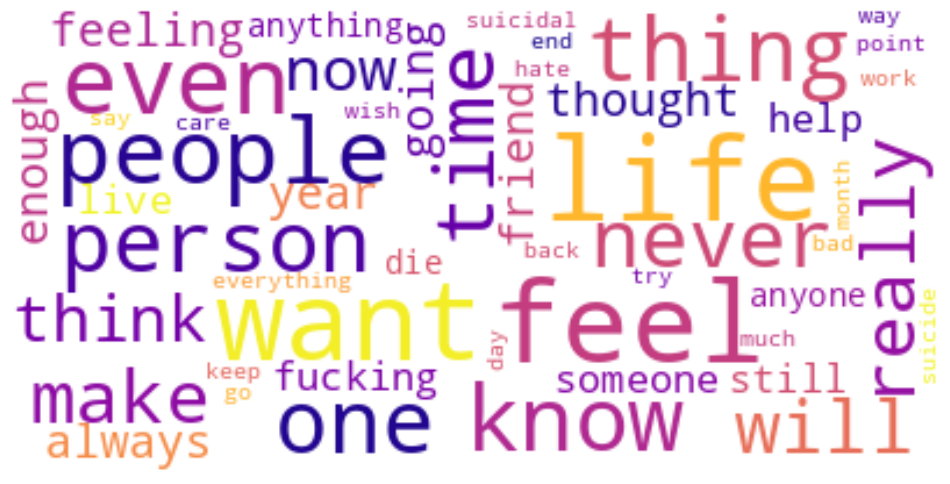

In [67]:
printwordcloud(text, 50)

### Obtenemos las palabras de medium risk

In [68]:
text = df[df['sentiment'].str.contains("medium risk", na=False)]['Content'].str.cat(sep=' ')

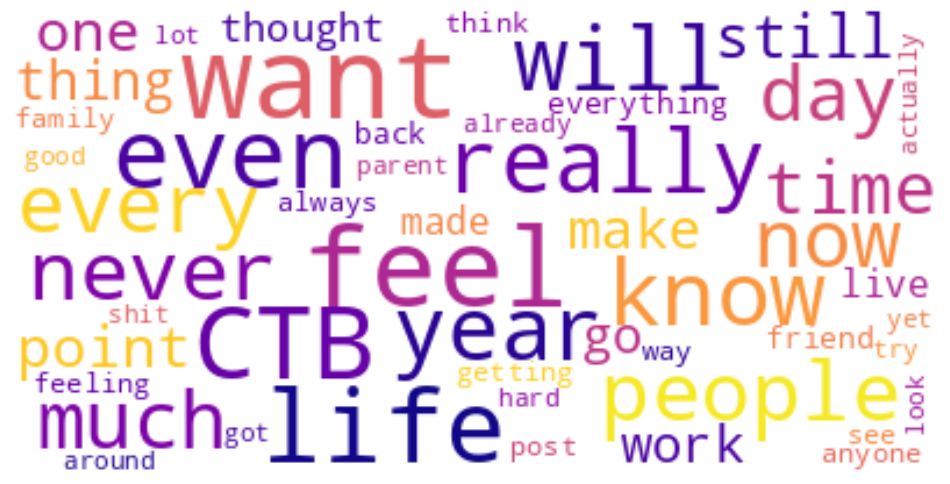

In [69]:
printwordcloud(text, 50)

### Obtenemos las palabras de righ risk

In [70]:
text = df[df['sentiment'].str.contains("high risk", na=False)]['Content'].str.cat(sep=' ')

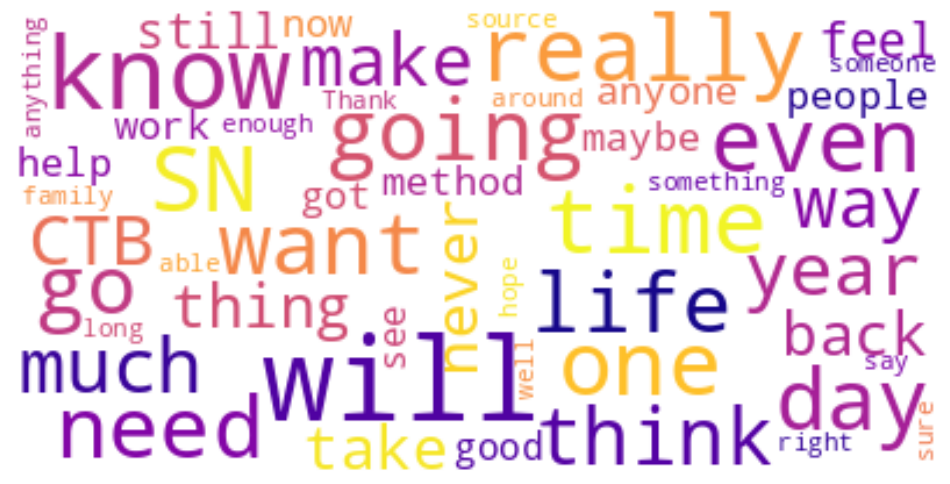

In [71]:
printwordcloud(text, 50)

### Obtenemos las palabras de method

In [72]:
text = df[df['sentiment'].str.contains("method", na=False)]['Content'].str.cat(sep=' ')

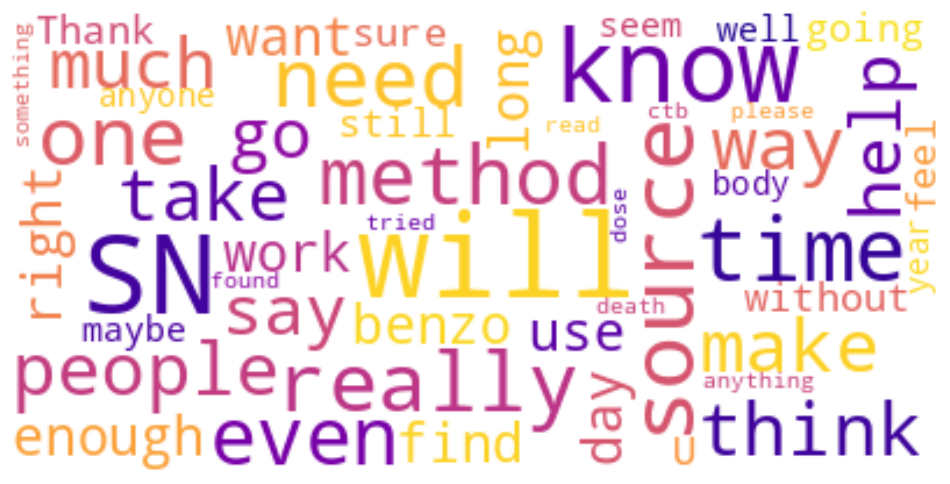

In [73]:
printwordcloud(text, 50)

### Obtenemos las palabras de supportive

In [74]:
text = df[df['sentiment'].str.contains("supportive", na=False)]['Content'].str.cat(sep=' ')

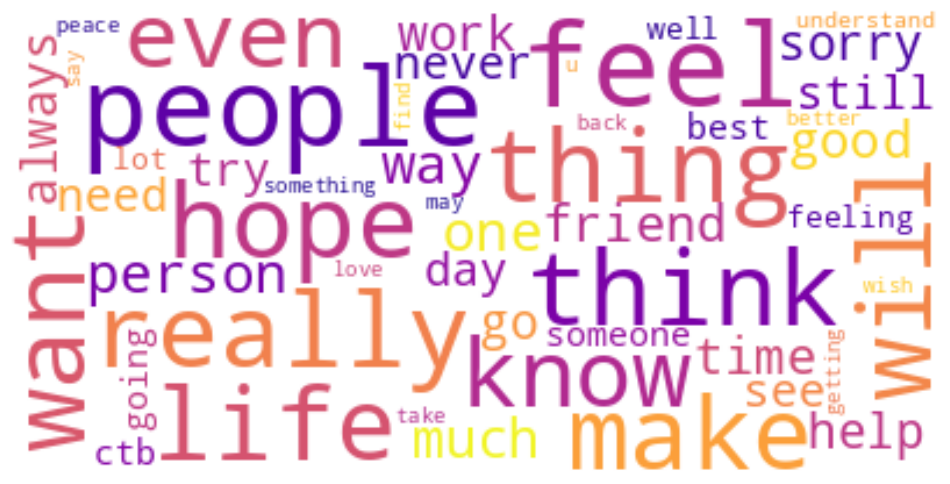

In [75]:
printwordcloud(text, 50)

### Obtenemos las palabras de negative

In [76]:
text = df[df['sentiment'].str.contains("suicide supportive", na=False)]['Content'].str.cat(sep=' ')

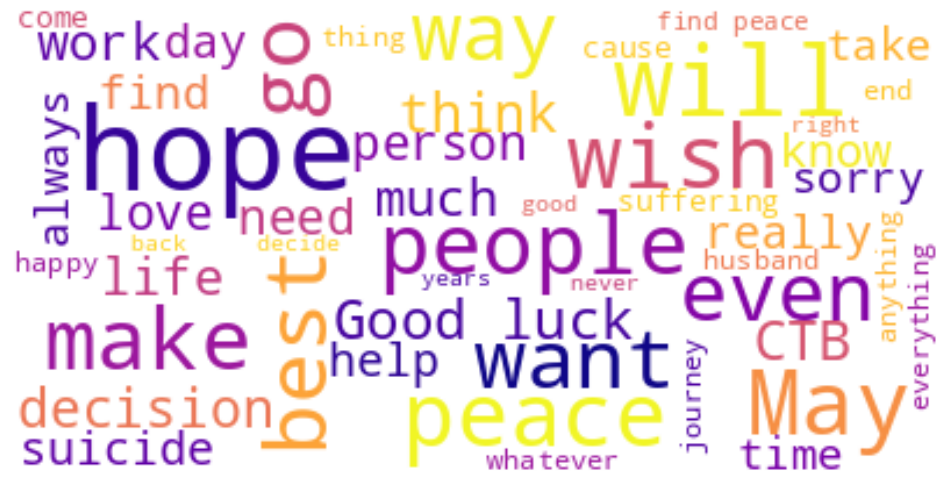

In [77]:
printwordcloud(text, 50)